In [1]:
import lattice
import hamiltonian
import retworkx

/Users/kensuketamura/.pyenv/versions/3.9.6/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# **General Lattice**

In [2]:
graph = retworkx.PyGraph()
graph.add_nodes_from(range(6))
weighted_edge_list = [(0, 1, 1.0), (0, 2, -1.0), (2, 3, 2.0), (4, 2, -1.0), (4, 4, 3.0), (2, 5, -1.0)]
graph.add_edges_from(weighted_edge_list)
general_lattice = lattice.Lattice(graph)

## visualization

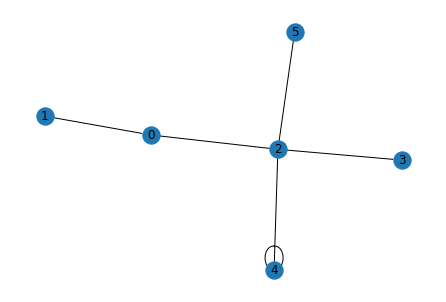

In [3]:
general_lattice.draw(with_labels=True)

## hopping matrix $t_{x, y}$

In [4]:
general_lattice.to_hopping_matrix()

array([[ 0.,  1., -1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  2., -1., -1.],
       [ 0.,  0.,  2.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  3.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  0.]])

## **Fermi-Hubbard model**

In [5]:
u = 2.0
hamiltonian.Fermi_Hubbard(
    lattice = general_lattice,
    onsite_int = u
)

FermionicOp([('+I-IIIIIIIII', (1+0j)), ('-I+IIIIIIIII', (-1+0j)), ('+III-IIIIIII', (-1+0j)), ('-III+IIIIIII', (1+0j)), ('IIII+I-IIIII', (2+0j)), ('IIII-I+IIIII', (-2+0j)), ('IIII+III-III', (-1+0j)), ('IIII-III+III', (1+0j)), ('IIIIIIIINIII', (3+0j)), ('IIII+IIIII-I', (-1+0j)), ('IIII-IIIII+I', (1+0j)), ('I+I-IIIIIIII', (1+0j)), ('I-I+IIIIIIII', (-1+0j)), ('I+III-IIIIII', (-1+0j)), ('I-III+IIIIII', (1+0j)), ('IIIII+I-IIII', (2+0j)), ('IIIII-I+IIII', (-2+0j)), ('IIIII+III-II', (-1+0j)), ('IIIII-III+II', (1+0j)), ('IIIIIIIIINII', (3+0j)), ('IIIII+IIIII-', (-1+0j)), ('IIIII-IIIII+', (1+0j)), ('NNIIIIIIIIII', (2+0j)), ('IINNIIIIIIII', (2+0j)), ('IIIINNIIIIII', (2+0j)), ('IIIIIINNIIII', (2+0j)), ('IIIIIIIINNII', (2+0j)), ('IIIIIIIIIINN', (2+0j))])

# **One-dimensional case**

In [6]:
lattice_points = 4
t = -1.0
onsite_potential = 1.0
one_dim_lattice = lattice.Line(
    num_nodes=lattice_points,
    hopping_parameter=t,
    onsite_potential=onsite_potential,
    boundary_condition="open"
)

## visualization

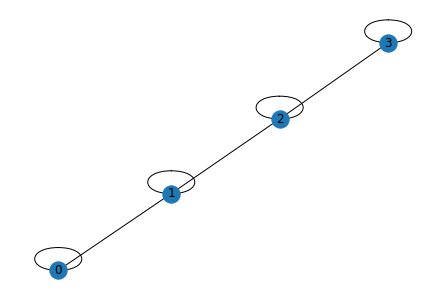

In [7]:
one_dim_lattice.draw(with_labels=True)

## hopping matrix

In [8]:
one_dim_lattice.to_hopping_matrix()

array([[ 1., -1.,  0.,  0.],
       [-1.,  1., -1.,  0.],
       [ 0., -1.,  1., -1.],
       [ 0.,  0., -1.,  1.]])

## **Fermi-Hubbard model**

In [33]:
U = 5.0
hamiltonian.Fermi_Hubbard(one_dim_lattice, U)

FermionicOp([('+I-IIIII', (-1+0j)), ('-I+IIIII', (1+0j)), ('II+I-III', (-1+0j)), ('II-I+III', (1+0j)), ('IIII+I-I', (-1+0j)), ('IIII-I+I', (1+0j)), ('NIIIIIII', (1+0j)), ('IINIIIII', (1+0j)), ('IIIINIII', (1+0j)), ('IIIIIINI', (1+0j)), ('I+I-IIII', (-1+0j)), ('I-I+IIII', (1+0j)), ('III+I-II', (-1+0j)), ('III-I+II', (1+0j)), ('IIIII+I-', (-1+0j)), ('IIIII-I+', (1+0j)), ('INIIIIII', (1+0j)), ('IIINIIII', (1+0j)), ('IIIIINII', (1+0j)), ('IIIIIIIN', (1+0j)), ('NNIIIIII', (5+0j)), ('IINNIIII', (5+0j)), ('IIIINNII', (5+0j)), ('IIIIIINN', (5+0j))])

## Operator expression

$$
\begin{align*}
H &= \sum_{i = 0}^{2} \sum_{\sigma = \uparrow, \downarrow} (t c_{i, \sigma}^\dagger c_{i+1, \sigma} + t c_{i+1, \sigma}^\dagger c_{i, \sigma})+ U \sum_{i=0}^{3} n_{i, \uparrow} n_{i, \downarrow} \\
&= t c_{0, \uparrow}^\dagger c_{1, \uparrow} - t c_{0, \uparrow} c_{1, \uparrow}^{\dagger} \\
& \ + t c_{1, \uparrow}^\dagger c_{2, \uparrow} - t c_{1, \uparrow} c_{2, \uparrow}^{\dagger} \\
& \ + t c_{2, \uparrow}^\dagger c_{3, \uparrow} - t c_{2, \uparrow} c_{3, \uparrow}^{\dagger} \\
& \ + v n_{0, \uparrow} + v n_{1, \uparrow} + v n_{2, \uparrow} + v n_{3, \uparrow} \\
& \ + t c_{0, \downarrow}^\dagger c_{1, \downarrow} - t c_{0, \downarrow} c_{1, \downarrow}^{\dagger} \\
& \ + t c_{1, \downarrow}^\dagger c_{2, \downarrow} - t c_{1, \downarrow} c_{2, \downarrow}^{\dagger} \\
& \ + t c_{2, \downarrow}^\dagger c_{3, \downarrow} - t c_{2, \downarrow} c_{3, \downarrow}^{\dagger} \\
& \ + v n_{0, \downarrow} + v n_{1, \downarrow} + v n_{2, \downarrow} + v n_{3, \downarrow} \\
& \ + U n_{0, \uparrow} n_{0, \downarrow} + U n_{1, \uparrow} n_{1, \downarrow} + + U n_{2, \uparrow} n_{2, \downarrow} + U n_{3, \uparrow} n_{3, \downarrow}
\end{align*}
$$